In [ ]:
# pip install scikit-learn

In [ ]:
# pip install keras-ncp tensorflow scikit-learn numpy

In [ ]:
# conda install scikit-learn

In [ ]:
# !pip install ipykernel
# python -m ipykernel install --user --name lnn --display-name "LNN Kernel"

In [ ]:
# !python -m ipykernel install --user --name lnn --display-name "LNN Kernel"

In [ ]:
# !pip install keras-ncp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, Dense
# from keras_ncp import ltc_cell



In [ ]:
# import sys
# print(sys.executable)


In [ ]:
# jupyter kernelspec list


In [ ]:
df= pd.read_csv('wti_prices.csv')
df

,date,open,high,low,close,volume,average
0,2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
1,2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2,2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
3,2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
4,2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...,...
2076,2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2077,2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2078,2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830
2079,2017-04-04,56.18,56.18,56.18,56.18,0.0,56.180


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     2081 non-null   object 
 1   open     2081 non-null   float64
 2   high     2081 non-null   float64
 3   low      2081 non-null   float64
 4   close    2081 non-null   float64
 5   volume   2081 non-null   float64
 6   average  2081 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.9+ KB


In [ ]:
df[df.duplicated(keep=False)]

,date,open,high,low,close,volume,average
1001,2020-04-02,43.66,43.66,43.66,43.66,0.0,43.66
1002,2020-04-03,42.77,42.77,42.77,42.77,0.0,42.77
1249,2019-04-05,53.44,53.44,53.44,53.44,0.0,53.44
1494,2020-04-02,43.66,43.66,43.66,43.66,0.0,43.66
1495,2020-04-03,42.77,42.77,42.77,42.77,0.0,42.77
1743,2019-04-05,53.44,53.44,53.44,53.44,0.0,53.44


In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated(keep=False)]

,date,open,high,low,close,volume,average


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

/tmp/ipython-input-299604038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,open,high,low,close,volume,average
date,,,,,,
2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...
2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830


In [ ]:
df= df.sort_index()


In [ ]:
# Sắp xếp lại các dòng dữ liệu
df = df.sort_index()
df = df.resample('D').asfreq()
df = df.interpolate()

print(df.index.dtype)
print(df.info())

df

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054 entries, 2016-11-23 to 2025-04-03
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     3054 non-null   float64
 1   high     3054 non-null   float64
 2   low      3054 non-null   float64
 3   close    3054 non-null   float64
 4   volume   3054 non-null   float64
 5   average  3054 non-null   float64
dtypes: float64(6)
memory usage: 167.0 KB
None


,open,high,low,close,volume,average
date,,,,,,
2016-11-23,58.660000,58.660000,58.660000,58.660000,0.000000,58.660000
2016-11-24,57.990000,57.990000,57.990000,57.990000,0.000000,57.990000
2016-11-25,57.320000,57.320000,57.320000,57.320000,0.000000,57.320000
2016-11-26,57.496667,57.496667,57.496667,57.496667,0.000000,57.496667
2016-11-27,57.673333,57.673333,57.673333,57.673333,0.000000,57.673333
...,...,...,...,...,...,...
2025-03-30,69.336667,70.613333,68.846667,70.113333,30596.666667,69.982667
2025-03-31,69.330000,71.240000,69.060000,70.870000,35933.000000,70.542000
2025-04-01,71.150000,71.520000,70.580000,70.690000,27070.000000,70.946000


In [ ]:
df.index.freq = 'D'
print(df.index.inferred_freq)

df

D


,open,high,low,close,volume,average
date,,,,,,
2016-11-23,58.660000,58.660000,58.660000,58.660000,0.000000,58.660000
2016-11-24,57.990000,57.990000,57.990000,57.990000,0.000000,57.990000
2016-11-25,57.320000,57.320000,57.320000,57.320000,0.000000,57.320000
2016-11-26,57.496667,57.496667,57.496667,57.496667,0.000000,57.496667
2016-11-27,57.673333,57.673333,57.673333,57.673333,0.000000,57.673333
...,...,...,...,...,...,...
2025-03-30,69.336667,70.613333,68.846667,70.113333,30596.666667,69.982667
2025-03-31,69.330000,71.240000,69.060000,70.870000,35933.000000,70.542000
2025-04-01,71.150000,71.520000,70.580000,70.690000,27070.000000,70.946000


In [ ]:
# Chọn cột 'close' làm đặc trưng để dự đoán
data = df[['close']]
data

,close
date,
2016-11-23,58.660000
2016-11-24,57.990000
2016-11-25,57.320000
2016-11-26,57.496667
2016-11-27,57.673333
...,...
2025-03-30,70.113333
2025-03-31,70.870000
2025-04-01,70.690000


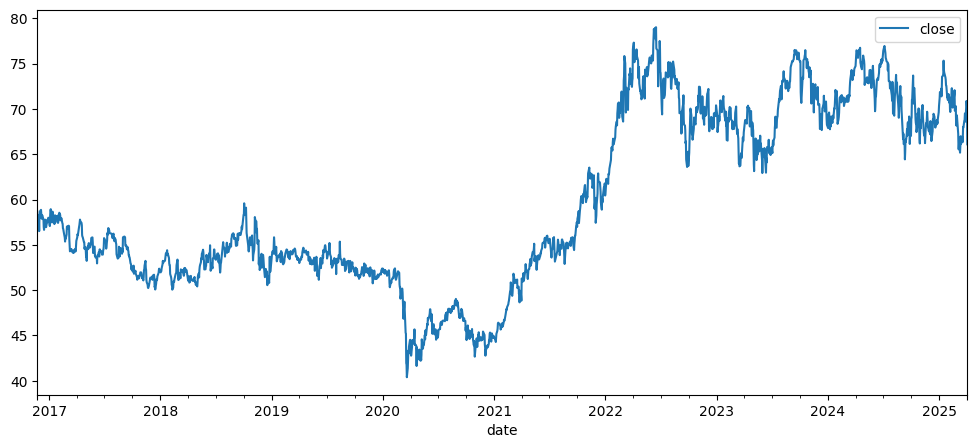

In [ ]:
data.plot(figsize=(12,5));

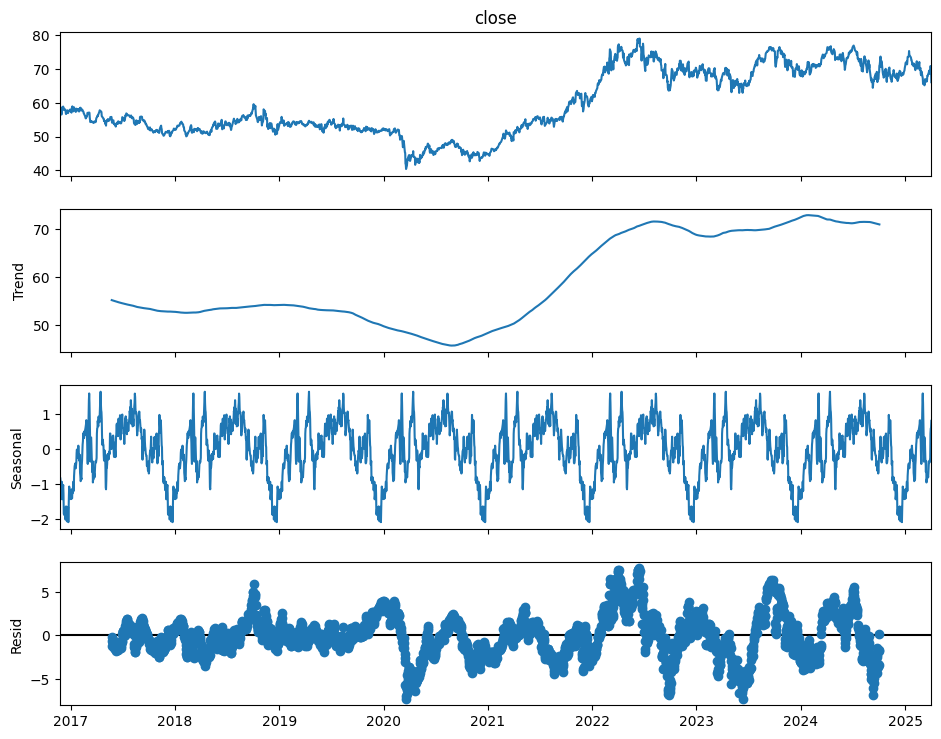

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
# data = df["close"].values.reshape(-1, 1)

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

# X = data_scaled[:-1]
# y = data_scaled[1:]
# lấy dữ liệu giá đóng cửa
data = df["close"].values.reshape(-1, 1)

# chuẩn hóa về 0–1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# tạo chuỗi input 6 bước dự đoán bước 61
window = 60
X, y = [], []

for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (2994, 60, 1)
Shape y: (2994, 1)


In [ ]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

khởi tạo mô hình LNN

In [ ]:
def model_lnn(input_dim, reservoir_dim, output_dim, spectral_radius=0.9):
    W_res = np.random.randn(reservoir_dim, reservoir_dim)
    eig_vals = np.linalg.eigvals(W_res)
    W_res *= spectral_radius / np.max(np.abs(eig_vals))
    W_in = np.random.randn(reservoir_dim, input_dim)
    W_out = np.zeros((output_dim, reservoir_dim))
    return W_res, W_in, W_out

In [ ]:
def reservoir_update(state, x, W_res, W_in, leak_rate):
    pre_activation = np.dot(W_res, state) + np.dot(W_in, x)
    new_state = (1 - leak_rate) * state + leak_rate * np.tanh(pre_activation)
    return new_state

In [ ]:
def train_lnn(X_train, y_train, W_res, W_in, W_out, leak_rate, ridge_lambda=1e-5):
    reservoir_dim = W_res.shape[0]
    state = np.zeros((reservoir_dim, 1))

    all_states = []

    for x in X_train:
        x = x.reshape(-1, 1)
        state = reservoir_update(state, x, W_res, W_in, leak_rate)
        all_states.append(state.flatten())

    all_states = np.array(all_states)

    # Ridge regression: W_out = y * X^T * (X X^T + λI)^-1
    XTX = all_states.T @ all_states
    XTy = all_states.T @ y_train

    W_out_new = np.linalg.solve(XTX + ridge_lambda*np.eye(reservoir_dim), XTy)

    return W_out_new.T

In [ ]:
def predict_lnn(X_test, W_res, W_in, W_out, leak_rate):
    reservoir_dim = W_res.shape[0]
    state = np.zeros((reservoir_dim, 1))

    preds = []

    for x in X_test:
        x = x.reshape(-1, 1)
        state = reservoir_update(state, x, W_res, W_in, leak_rate)
        y_hat = np.dot(W_out, state)
        preds.append(y_hat[0][0])

    return np.array(preds).reshape(-1, 1)

In [ ]:
input_dim = 1
output_dim = 1
reservoir_dim = 300
spectral_radius = 0.9
leak_rate = 0.3

W_res, W_in, W_out = model_lnn(
    input_dim, reservoir_dim, output_dim, spectral_radius
)

In [ ]:
def train_lnn(X_train, y_train, W_res, W_in, W_out, leak_rate, ridge_lambda=1e-5):
    reservoir_dim = W_res.shape[0]
    all_states_after_window = []

    # Iterate over each sample in the training data (each sample is a window of inputs)
    for x_sample in X_train: # x_sample has shape (window, input_dim) e.g., (30, 1)
        state = np.zeros((reservoir_dim, 1)) # Initialize reservoir state for this sample

        # Iterate over each time step within the current window
        for x_t in x_sample: # x_t has shape (input_dim,) e.g., (1,)
            x_t = x_t.reshape(-1, 1) # Reshape to (input_dim, 1) e.g., (1, 1) for reservoir_update
            state = reservoir_update(state, x_t, W_res, W_in, leak_rate)
        all_states_after_window.append(state.flatten()) # Store the final state after processing the whole window

    all_states_after_window = np.array(all_states_after_window)

    # Perform Ridge regression to find W_out
    XTX = all_states_after_window.T @ all_states_after_window
    XTy = all_states_after_window.T @ y_train

    W_out_new = np.linalg.solve(XTX + ridge_lambda * np.eye(reservoir_dim), XTy)

    return W_out_new.T

In [ ]:

def predict_lnn(X_test, W_res, W_in, W_out, leak_rate):
    reservoir_dim = W_res.shape[0]
    preds = []

    # Iterate over each sample in the test data (each sample is a window of inputs)
    for x_sample in X_test: # x_sample has shape (window, input_dim) e.g., (30, 1)
        state = np.zeros((reservoir_dim, 1)) # Initialize reservoir state for this sample

        # Iterate over each time step within the current window
        for x_t in x_sample: # x_t has shape (input_dim,) e.g., (1,)
            x_t = x_t.reshape(-1, 1) # Reshape to (input_dim, 1) e.g., (1, 1) for reservoir_update
            state = reservoir_update(state, x_t, W_res, W_in, leak_rate)

        # After processing the entire window, make a prediction using the final state
        y_hat = np.dot(W_out, state)
        preds.append(y_hat[0][0])

    return np.array(preds).reshape(-1, 1)

W_out_trained = train_lnn(
    X_train, y_train,
    W_res, W_in, W_out,
    leak_rate,
    ridge_lambda=1e-4
)

In [ ]:
def model_lnn(input_dim, reservoir_dim, output_dim, spectral_radius=0.9):
    W_res = np.random.randn(reservoir_dim, reservoir_dim)
    eig_vals = np.linalg.eigvals(W_res)
    W_res *= spectral_radius / np.max(np.abs(eig_vals))
    W_in = np.random.randn(reservoir_dim, input_dim)
    W_out = np.zeros((output_dim, reservoir_dim))
    return W_res, W_in, W_out
def reservoir_update(state, x, W_res, W_in, leak_rate):
    pre_activation = np.dot(W_res, state) + np.dot(W_in, x)
    new_state = (1 - leak_rate) * state + leak_rate * np.tanh(pre_activation)
    return new_state
def train_lnn(X_train, y_train, W_res, W_in, W_out, leak_rate, ridge_lambda=1e-5):
    reservoir_dim = W_res.shape[0]
    state = np.zeros((reservoir_dim, 1))

    all_states = []

    for x in X_train:
        x = x.reshape(-1, 1)
        state = reservoir_update(state, x, W_res, W_in, leak_rate)
        all_states.append(state.flatten())

    all_states = np.array(all_states)

    # Ridge regression: W_out = y * X^T * (X X^T + λI)^-1
    XTX = all_states.T @ all_states
    XTy = all_states.T @ y_train

    W_out_new = np.linalg.solve(XTX + ridge_lambda*np.eye(reservoir_dim), XTy)

    return W_out_new.T
def predict_lnn(X_test, W_res, W_in, W_out, leak_rate):
    reservoir_dim = W_res.shape[0]
    state = np.zeros((reservoir_dim, 1))

    preds = []

    for x in X_test:
        x = x.reshape(-1, 1)
        state = reservoir_update(state, x, W_res, W_in, leak_rate)
        y_hat = np.dot(W_out, state)
        preds.append(y_hat[0][0])

    return np.array(preds).reshape(-1, 1)

input_dim = 1
output_dim = 1
reservoir_dim = 300
spectral_radius = 0.9
leak_rate = 0.3

W_res, W_in, W_out = model_lnn(
    input_dim, reservoir_dim, output_dim, spectral_radius
)
def train_lnn(X_train, y_train, W_res, W_in, W_out, leak_rate, ridge_lambda=1e-5):
    reservoir_dim = W_res.shape[0]
    all_states_after_window = []

    # Iterate over each sample in the training data (each sample is a window of inputs)
    for x_sample in X_train: # x_sample has shape (window, input_dim) e.g., (30, 1)
        state = np.zeros((reservoir_dim, 1)) # Initialize reservoir state for this sample

        # Iterate over each time step within the current window
        for x_t in x_sample: # x_t has shape (input_dim,) e.g., (1,)
            x_t = x_t.reshape(-1, 1) # Reshape to (input_dim, 1) e.g., (1, 1) for reservoir_update
            state = reservoir_update(state, x_t, W_res, W_in, leak_rate)
        all_states_after_window.append(state.flatten()) # Store the final state after processing the whole window

    all_states_after_window = np.array(all_states_after_window)

    # Perform Ridge regression to find W_out
    XTX = all_states_after_window.T @ all_states_after_window
    XTy = all_states_after_window.T @ y_train

    W_out_new = np.linalg.solve(XTX + ridge_lambda * np.eye(reservoir_dim), XTy)

    return W_out_new.T

def predict_lnn(X_test, W_res, W_in, W_out, leak_rate):
    reservoir_dim = W_res.shape[0]
    preds = []

    # Iterate over each sample in the test data (each sample is a window of inputs)
    for x_sample in X_test: # x_sample has shape (window, input_dim) e.g., (30, 1)
        state = np.zeros((reservoir_dim, 1)) # Initialize reservoir state for this sample

        # Iterate over each time step within the current window
        for x_t in x_sample: # x_t has shape (input_dim,) e.g., (1,)
            x_t = x_t.reshape(-1, 1) # Reshape to (input_dim, 1) e.g., (1, 1) for reservoir_update
            state = reservoir_update(state, x_t, W_res, W_in, leak_rate)

        # After processing the entire window, make a prediction using the final state
        y_hat = np.dot(W_out, state)
        preds.append(y_hat[0][0])

    return np.array(preds).reshape(-1, 1)

W_out_trained = train_lnn(
    X_train, y_train,
    W_res, W_in, W_out,
    leak_rate,
    ridge_lambda=1e-4
)
from sklearn.metrics import mean_squared_error

pred_scaled = predict_lnn(
    X_test,
    W_res, W_in, W_out_trained,
    leak_rate
)

pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)

mse_lnn = mean_squared_error(actual, pred)
print("LNN MSE:", mse_lnn)

In [ ]:
# print("W_in:\n", W_in)
# print("W_res:\n", W_res)
# print("W_out:\n", W_out)

In [ ]:
from sklearn.metrics import mean_squared_error

pred_scaled = predict_lnn(
    X_test,
    W_res, W_in, W_out_trained,
    leak_rate
)

pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)

mse_lnn = mean_squared_error(actual, pred)
print("LNN MSE:", mse_lnn)


LNN MSE: 0.48219964283847694


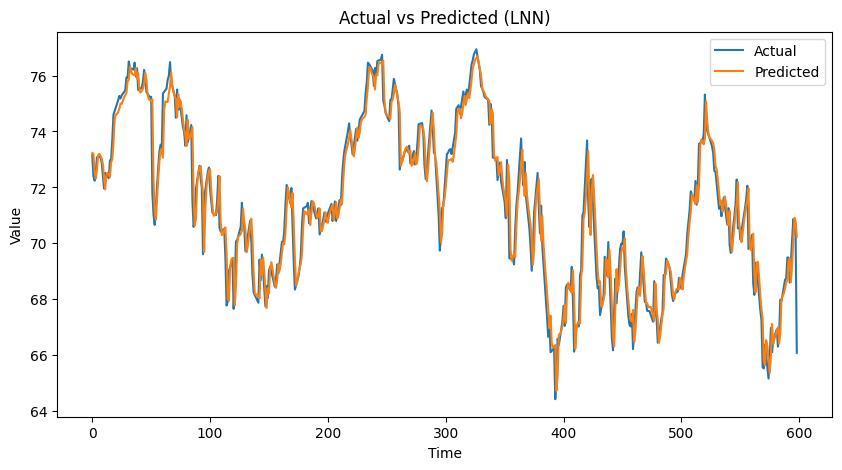

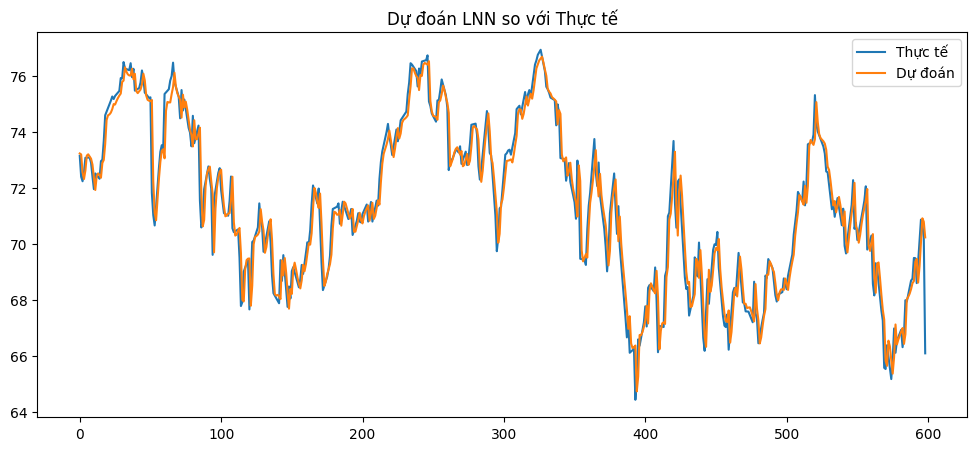

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(actual, label='Thực tế')
plt.plot(pred, label='Dự đoán')
plt.title("Dự đoán LNN so với Thực tế")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
rmse_lnn = np.sqrt(mse_lnn)
mae_lnn = mean_absolute_error(actual, pred)
r2_lnn = r2_score(actual, pred)

print("RMSE:", rmse_lnn)
print("MAE:", mae_lnn)
print("LNN R-squared:", r2_lnn)


RMSE: 0.6944059639997895
MAE: 0.49675191407453334
LNN R-squared: 0.9412468066432407


In [ ]:
import pandas as pd

df_compare = pd.DataFrame({
    "Actual": actual[:10].flatten(),
    "Predicted": pred[:10].flatten()
})

print(df_compare)


      Actual  Predicted
0  73.150000  73.233562
1  72.400000  73.200096
2  72.240000  72.551227
3  72.570000  72.318871
4  73.080000  72.626944
5  73.083333  73.159238
6  73.086667  73.204025
7  73.090000  73.122461
8  72.900000  73.046745
9  72.410000  72.836315


### Đánh giá mô hình LNN với các chỉ số khác

### Xây dụng mô hình LNN

In [ ]:
# # Ví dụ về Keras
# import tensorflow as tf
# from keras_ncp import ltc_cell

# # Tạo một mô hình tuần tự đơn giản với một lớp LTC
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(None, input_features)), # Chuỗi thời gian
#     tf.keras.layers.RNN(ltc_cell.LTCCell(units=32)), # Tế bào LTC
#     tf.keras.layers.Dense(output_features, activation='softmax') # Lớp đầu ra
# ])

In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Bắt đầu huấn luyện
# history = model.fit(
#     X_train, y_train,
#     epochs=10, # Số lần lặp lại trên toàn bộ dữ liệu
#     validation_data=(X_val, y_val) # Sử dụng tập xác thực để kiểm tra
# )

In [ ]:
# # Tạo dự đoán
# predictions = model.predict(X_new_data)